Project 5: Election Prognostications
Wassie, Mekdes
Aziz, Zaid
Morgen, Nadia

Problem Statement:
Can we create a model that more accurately predicts the outcome of the 2021 California gubernatorial recall election?

For decades, election polls predicted the winner accurately.  That has shifted in more recent years.  In 2016, very few pollsters predicted that Trump would win.  The few pollsters who predicted a narrower victory for Hillary faced harsh criticism.  At WAM! News, we are trying to develop a more accurate model than our competitors. Using the CCES Dataset from Harvard University, we will build a classification model that accurately classifies and predicts CA’s gubernatorial preferences. The model will be evaluated based on accuracy, specificity, and recall, with the goal of trying to get achieving higher accuracy than the null model and our competitors.

## Imports
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## EDA
---

In [2]:
df = pd.read_csv('../Data/CCES_data_EDA.csv')

In [3]:
df.head()

,Unnamed: 0,year,case_id,weight,weight_cumulative,state,st,cong,cong_up,state_post,...,voted_rep_chosen,voted_sen_chosen,voted_gov_chosen,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current
0,11,2006,439269,0.902890,0.813124,California,CA,109,110,California,...,John W. Jones (R),"Richard ""Dick"" Mountjoy (R)",NaN,Mike Thompson (D),29901.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Arnold Schwarzenegger (R)
1,12,2006,439270,0.612356,0.551475,California,CA,109,110,California,...,NaN,"Richard ""Dick"" Mountjoy (R)",Arnold Schwarzenegger (R),Mike Thompson (D),29901.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Arnold Schwarzenegger (R)
2,31,2006,439370,0.721931,0.650156,California,CA,109,110,California,...,Sharon M. Beery (D),NaN,"Philip ""Phil"" Angelides (D)",William M. Thomas (R),14669.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Arnold Schwarzenegger (R)
3,33,2006,439382,1.992852,1.794722,California,CA,109,110,California,...,NaN,NaN,NaN,Nancy Pelosi (D),15448.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Arnold Schwarzenegger (R)
4,38,2006,439409,1.851676,1.667581,California,CA,109,110,California,...,Dana Rohrabacher (R),"Richard ""Dick"" Mountjoy (R)",Arnold Schwarzenegger (R),Dana Rohrabacher (R),15621.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Arnold Schwarzenegger (R)


In [4]:
#Dropping all data prior to 2016
df.drop(df[df.year < 2016].index, inplace=True)

In [5]:
df.shape

(19799, 94)

In [6]:
cali = df.copy()

In [7]:
cali.head()

,Unnamed: 0,year,case_id,weight,weight_cumulative,state,st,cong,cong_up,state_post,...,voted_rep_chosen,voted_sen_chosen,voted_gov_chosen,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current
29984,309976,2016,299793268,2.464577,1.251364,California,CA,114,115,California,...,NaN,NaN,NaN,Jerry McNerney (D),20702.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29985,309979,2016,299929287,2.049700,1.040715,California,CA,114,115,NaN,...,NaN,NaN,NaN,Brad Sherman (D),29707.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29986,309994,2016,300678759,0.278606,0.141459,California,CA,114,115,California,...,Ted Lieu (D),Kamala D. Harris (D),NaN,Ted Lieu (D),21507.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29987,309995,2016,300756130,0.064245,0.032620,California,CA,114,115,California,...,NaN,NaN,NaN,Kevin McCarthy (R),20703.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29988,310003,2016,300894516,0.209963,0.106606,California,CA,114,115,California,...,Brett Murdock (D),Kamala D. Harris (D),NaN,Ed Royce (R),29321.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)


In [8]:
# Limit dataframe to California
# code is a little weird, but at this point, cali = df2, so it works

cali.drop(df[df.state != 'California'].index, inplace=True)

In [9]:
cali.shape

(19799, 94)

In [10]:
cali.head(10)

,Unnamed: 0,year,case_id,weight,weight_cumulative,state,st,cong,cong_up,state_post,...,voted_rep_chosen,voted_sen_chosen,voted_gov_chosen,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current
29984,309976,2016,299793268,2.464577,1.251364,California,CA,114,115,California,...,NaN,NaN,NaN,Jerry McNerney (D),20702.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29985,309979,2016,299929287,2.049700,1.040715,California,CA,114,115,NaN,...,NaN,NaN,NaN,Brad Sherman (D),29707.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29986,309994,2016,300678759,0.278606,0.141459,California,CA,114,115,California,...,Ted Lieu (D),Kamala D. Harris (D),NaN,Ted Lieu (D),21507.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29987,309995,2016,300756130,0.064245,0.032620,California,CA,114,115,California,...,NaN,NaN,NaN,Kevin McCarthy (R),20703.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29988,310003,2016,300894516,0.209963,0.106606,California,CA,114,115,California,...,Brett Murdock (D),Kamala D. Harris (D),NaN,Ed Royce (R),29321.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29989,310008,2016,300931090,1.537359,0.780579,California,CA,114,115,California,...,Brad Sherman (D),Kamala D. Harris (D),NaN,Brad Sherman (D),29707.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29990,310011,2016,300996404,1.172477,0.595313,California,CA,114,115,California,...,"Juan M. Hidalgo, Jr. (R)",Loretta L. Sanchez (D),NaN,Juan Vargas (D),21314.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29991,310018,2016,301045806,2.929296,1.487321,California,CA,114,115,California,...,Anna Eshoo (D),Loretta L. Sanchez (D),NaN,Anna Eshoo (D),29312.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29992,310024,2016,301092237,0.825176,0.418975,California,CA,114,115,California,...,Grace Napolitano (D),Loretta L. Sanchez (D),NaN,Grace Napolitano (D),29903.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29993,310041,2016,301124709,0.958000,0.486415,California,CA,114,115,California,...,Jared Huffman (D),Kamala D. Harris (D),NaN,Jared Huffman (D),21303.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)


In [11]:
# drop state column, since it's the same as st column
cali.drop('state_post', axis =1, inplace= True)

In [12]:
cali.drop('state', axis =1, inplace= True)
cali.drop('st_post', axis =1, inplace= True)

In [13]:
cali.shape

(19799, 91)

In [14]:
cali.head(3)

,Unnamed: 0,year,case_id,weight,weight_cumulative,st,cong,cong_up,dist,dist_up,...,voted_rep_chosen,voted_sen_chosen,voted_gov_chosen,rep_current,rep_icpsr,sen1_current,sen1_icpsr,sen2_current,sen2_icpsr,gov_current
29984,309976,2016,299793268,2.464577,1.251364,CA,114,115,9,9,...,NaN,NaN,NaN,Jerry McNerney (D),20702.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29985,309979,2016,299929287,2.049700,1.040715,CA,114,115,30,30,...,NaN,NaN,NaN,Brad Sherman (D),29707.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)
29986,309994,2016,300678759,0.278606,0.141459,CA,114,115,33,33,...,Ted Lieu (D),Kamala D. Harris (D),NaN,Ted Lieu (D),21507.0,Dianne Feinstein (D),49300,Barbara Boxer (D),15011,Jerry Brown (D)


# Create DataFrames By Year, 2016 - 2020

In [15]:
cali16 = cali[(cali['year'] == 2016)]

In [16]:
cali16.shape

(6021, 91)

In [17]:
cali17 = cali[(cali['year'] == 2017)]

In [18]:
cali17.shape

(1816, 91)

In [19]:
cali18 = cali[(cali['year'] == 2018)]

In [20]:
cali18.shape

(5284, 91)

In [21]:
cali19 = cali[(cali['year'] == 2019)]

In [22]:
cali19.shape

(1650, 91)

In [23]:
cali20 = cali[(cali['year'] == 2020)]

In [24]:
cali20.shape

(5028, 91)

# Count Missing Values (all years)

In [25]:
cali['gender'].isna().sum()

0

In [26]:
cali['age'].isna().sum()

0

In [27]:
cali['educ'].isna().sum()

0

In [28]:
cali['race'].isna().sum()

0

In [29]:
# Need to investigate further
cali['hispanic'].isna().sum()

3268

In [30]:
# This number is surprisingly low... I'm not going to drop them yet, 
# because I suspect that we'll find more when we start crunching.

cali['faminc'].isna().sum()

33

In [31]:
n_2016 = 6021
n_2017 = 1816
n_2018 = 5284
n_2019 = 1650
n_2020 = 5028

# 2016

In [32]:
# n = 6,021 respondents
cali16['race'].value_counts()

White              3355
Hispanic           1121
Asian               632
Black               504
Mixed               222
Other               102
Native American      71
Middle Eastern       14
Name: race, dtype: int64

In [33]:
cali16['race'].count()

6021

In 2016, everyone answered the race question.

In [34]:
cali16['hispanic'].isna().sum()

1145

In [35]:
cali16['hispanic'].count()

4876

In [36]:
# Percent of 'hispanic' responses missing - 2016
1145 / 4876

0.2348236259228876

In [37]:
# Total Hispanic respondents (from race and hispanic variables)
cali16['hispanic'].value_counts()

No     4448
Yes     428
Name: hispanic, dtype: int64

In [38]:
# 2016 percentage of respondents who identified as Hispanic
(428 + 1121) / n_2016

0.2572662348447102

## 2017

In [39]:
# n = 1,816 respondents
cali17['race'].value_counts()

White              859
Hispanic           542
Black              155
Asian               97
Mixed               93
Other               47
Native American     18
Middle Eastern       5
Name: race, dtype: int64

In [40]:
cali17['hispanic'].value_counts()

No     1129
Yes     139
Name: hispanic, dtype: int64

In [41]:
# 2017 percentage of respondents who identified as Hispanic
(139 + 542) / n_2017

0.375

In [42]:
cali17['hispanic'].isna().sum()

548

In [43]:
cali17['hispanic'].count()

1268

In [44]:
# Percent of 'hispanic' responses missing - 2017
548 / 1268

0.43217665615141954

## 2018

In [45]:
# n = 5284
cali18['race'].value_counts()

White              3011
Hispanic           1048
Asian               487
Black               364
Mixed               240
Other                67
Native American      45
Middle Eastern       22
Name: race, dtype: int64

In [46]:
cali18['hispanic'].value_counts()

No     4949
Yes     335
Name: hispanic, dtype: int64

In [47]:
# 2018 percentage of respondents who identified as Hispanic
(335 + 1048) / n_2018

0.2617335352006056

In [48]:
# No missing 'hispanic' data for 2018?  Well, at least not yet....
cali18['hispanic'].isna().sum()

0

## 2019

In [49]:
# n = 1650
cali19['race'].value_counts()

White              842
Hispanic           471
Asian              120
Black              113
Mixed               51
Native American     32
Other               18
Middle Eastern       3
Name: race, dtype: int64

In [50]:
cali19['hispanic'].value_counts()

No     1135
Yes      41
Name: hispanic, dtype: int64

In [51]:
# 2019 percentage of respondents who identified as Hispanic
(41 + 471) / n_2019

0.3103030303030303

In [52]:
cali19['hispanic'].isna().sum()

474

In [53]:
cali19['hispanic'].count()

1176

In [54]:
# Percent of 'hispanic' responses missing - 2019
474 / 1176

0.4030612244897959

## 2020

In [55]:
# n = 5028
cali20['race'].value_counts()

White              2659
Hispanic           1097
Asian               505
Black               406
Mixed               158
Other               143
Native American      49
Middle Eastern       11
Name: race, dtype: int64

In [56]:
cali20['hispanic'].value_counts()

No     3674
Yes     253
Name: hispanic, dtype: int64

In [57]:
# 2020 percentage of respondents who identified as Hispanic
(1097 + 253) / n_2020

0.2684964200477327

In [58]:
cali20['hispanic'].isna().sum()

1101

In [59]:
cali20['hispanic'].count()

3927

In [60]:
# Percent of 'hispanic' responses missing - 2020
1101 / 3927

0.28036669213139803

Missing Hispanic data peaked in 2016, the same year Trump was elected, and decreased in 2020, the same year Biden was elected.  2018 might be an exception, but I suspect that we'll discover otherwise once we start crunching the data.

In [61]:
cali20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5028 entries, 44755 to 49782
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5028 non-null   int64  
 1   year               5028 non-null   int64  
 2   case_id            5028 non-null   int64  
 3   weight             5028 non-null   float64
 4   weight_cumulative  5028 non-null   float64
 5   st                 5028 non-null   object 
 6   cong               5028 non-null   int64  
 7   cong_up            5028 non-null   int64  
 8   dist               5028 non-null   int64  
 9   dist_up            5028 non-null   int64  
 10  cd                 5028 non-null   object 
 11  cd_up              5028 non-null   object 
 12  dist_post          4234 non-null   float64
 13  dist_up_post       4234 non-null   float64
 14  cd_post            4234 non-null   object 
 15  cd_up_post         4234 non-null   object 
 16  zipcode            

# Demographics Over Time:  Age

In [62]:
df.value_counts('age')

age
29    493
28    430
59    430
34    426
35    420
     ... 
89     14
90      8
91      4
92      4
93      4
Length: 76, dtype: int64

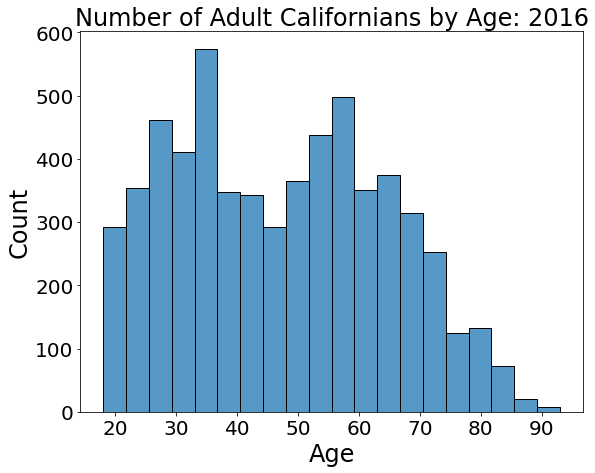

In [63]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.histplot(cali16, x="age", bins=20)
ax.set_xlabel('Age', size=24)
ax.set_ylabel('Count', size=24)
ax.set_title('Number of Adult Californians by Age: 2016', size =24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show();

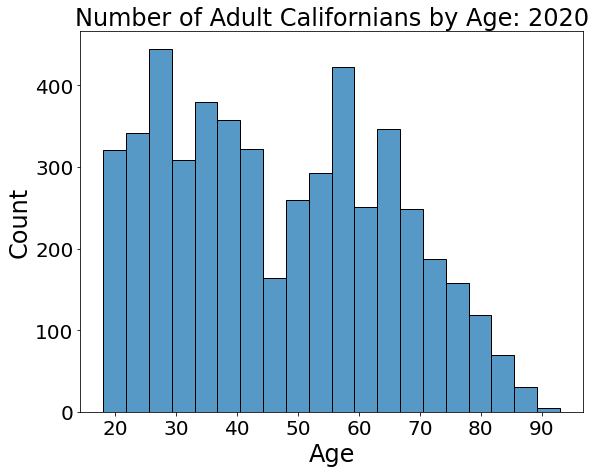

In [64]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.histplot(cali20, x="age", bins=20)
ax.set_xlabel('Age', size=24)
ax.set_ylabel('Count', size=24)
ax.set_title('Number of Adult Californians by Age: 2020', size =24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show();

In [65]:
# Based on the plots, I suspect that CA might have gotten younger
cali16['age'].median()

47.0

In [66]:
cali20['age'].median()

45.0

California's median age dropped 2 years between 2016 and 2020.

# Demographics Over Time: Race

In [67]:
cali16.value_counts('race')

race
White              3355
Hispanic           1121
Asian               632
Black               504
Mixed               222
Other               102
Native American      71
Middle Eastern       14
dtype: int64

In [68]:
pct_White16 = 3355 / n_2016
pct_Hisp16 = (1121 + 428) / n_2016
pct_Asian16 = 632 / n_2016
pct_Black16 = 504 / n_2016
pct_Mixed16 = 222 / n_2016
pct_Other16 = 102 / n_2016
pct_Native16 = 71 / n_2016
pct_ME16 = 14 / n_2016

In [69]:
cali20.value_counts('race')

race
White              2659
Hispanic           1097
Asian               505
Black               406
Mixed               158
Other               143
Native American      49
Middle Eastern       11
dtype: int64

In [70]:
pct_White20 = 2659 / n_2020
pct_Hisp20 = (1097+253)/ n_2020
pct_Asian20 = 505 / n_2020
pct_Black20 = 406 / n_2020
pct_Mixed20 = 158 / n_2020
pct_Other20 = 143 / n_2020
pct_Native20 = 49 / n_2020
pct_ME20 = 11 / n_2020

In [71]:
print('2016')
print(f'Pct White: {pct_White16}')
print(f'Pct Hisp: {pct_Hisp16}')
print(f'Pct Asian: {pct_Asian16}')
print(f'Pct Black: {pct_Black16}')
print(f'Pct Mixed: {pct_Mixed16}')
print(f'Pct Other: {pct_Other16}')
print(f'Pct Native: {pct_Native16}')
print(f'Pct ME: {pct_ME16}')


2016
Pct White: 0.5572164092343465
Pct Hisp: 0.2572662348447102
Pct Asian: 0.10496595249958479
Pct Black: 0.08370702541106129
Pct Mixed: 0.03687095166915795
Pct Other: 0.016940707523667164
Pct Native: 0.01179206111941538
Pct ME: 0.002325195150307258


In [72]:
print('2020')
print(f'Pct White: {pct_White20}')
print(f'Pct Hisp: {pct_Hisp20}')
print(f'Pct Asian: {pct_Asian20}')
print(f'Pct Black: {pct_Black20}')
print(f'Pct Mixed: {pct_Mixed20}')
print(f'Pct Other: {pct_Other20}')
print(f'Pct Native: {pct_Native20}')
print(f'Pct ME: {pct_ME20}')

2020
Pct White: 0.5288385043754972
Pct Hisp: 0.2684964200477327
Pct Asian: 0.10043754972155927
Pct Black: 0.0807478122513922
Pct Mixed: 0.031424025457438345
Pct Other: 0.028440731901352427
Pct Native: 0.009745425616547334
Pct ME: 0.0021877486077963404


Small racial differences, but if they reflect shifts in California as a whole, then they could be significant, especially given that the survey authors note that Hispanics are likely undercounted.  The numbers above show a 3% decline in the proportion of whites and a 1.1% increase in the number of Hispanics.  Other groups either remained constant or comprise too little of the sample to gauge any trends.

# Demographics Over Time: Marital Status

In [73]:
cali16.value_counts('marstat')

marstat
Married                   2986
Single / Never Married    1834
Divorced                   610
Widowed                    258
Domestic Partnership       229
Separated                   96
dtype: int64

In [74]:
# 2016 marstat_n = 6,013
married_16 = 2986 / 6013
single_nm_16 = 1834 / 6013
divorced_16 = 610 / 6013
widowed_16 = 258 / 6013
dom_pt_16 = 229 / 6013
sep_16 = 96 / 6013

In [75]:
print('2016')
print(f'Married: {married_16}')
print(f'Single: {single_nm_16}')
print(f'Divorced: {divorced_16}')
print(f'Widowed: {widowed_16}')
print(f'Dom. Parter: {dom_pt_16}')
print(f'Separated: {sep_16}')

2016
Married: 0.49659072010643607
Single: 0.3050058207217695
Divorced: 0.10144686512556128
Widowed: 0.04290703475802428
Dom. Parter: 0.03808415100615333
Separated: 0.015965408282055546


In [76]:
cali20.value_counts('marstat')

marstat
Married                   2108
Single / Never Married    1793
Divorced                   495
Domestic Partnership       308
Widowed                    232
Separated                   89
dtype: int64

There's a possible increase in domestic partnerships and a possible decrease in divorced respondents.  If marital status proves significant, I'll look into this further.

In [77]:
# 2020 marstat_n = 5025
married_20 = 2108 / 5025
single_nm_20 = 1793 / 5025
divorced_20 = 495 / 5025
widowed_20 = 308 / 5025
dom_pt_20 = 232 / 5025
sep_20 = 89 / 5025

In [78]:
print('2020')
print(f'Married: {married_20}')
print(f'Single: {single_nm_20}')
print(f'Divorced: {divorced_20}')
print(f'Widowed: {widowed_20}')
print(f'Dom. Parter: {dom_pt_20}')
print(f'Separated: {sep_20}')

2020
Married: 0.41950248756218905
Single: 0.35681592039800997
Divorced: 0.09850746268656717
Widowed: 0.061293532338308455
Dom. Parter: 0.04616915422885572
Separated: 0.01771144278606965


The percentage of married respondents is 8% lower in 2020 than in 2016.  The percentage of never married respondents is 5% higher in 2020 than in 2016.  Widowers increased 1.5%, perhaps because of COVID.  Domestic partnerships increased by about .8%.  Small demographic shifts can make a large impact in polling if they are not factored into models accurately.

# Demographics Over Time:  Political Ideology

In [79]:
cali16.value_counts('ideo5')

ideo5
Moderate             2076
Liberal              1458
Conservative         1190
Very Liberal          605
Very Conservative     355
Not Sure              330
dtype: int64

In [80]:
cali20.value_counts('ideo5')

ideo5
Moderate             1603
Liberal              1165
Very Liberal          809
Conservative          685
Very Conservative     408
Not Sure              355
dtype: int64

In [81]:
cali16.value_counts('ideo5')

ideo5
Moderate             2076
Liberal              1458
Conservative         1190
Very Liberal          605
Very Conservative     355
Not Sure              330
dtype: int64

In [82]:
# Total number of respondents answering ideo5 in 2016 = 6,014
Moderate_16 = 2076/6014
Liberal_16 = 1458/6014
V_lib_16 = 605/6014
Con_16 = 1190 / 6014
V_Con_16 = 355 / 6014
Unsure_16 = 330/6014
unsure_mods_16 = (330 + 2076) / 6014

In [83]:
print('2016')
print(f'Moderate: {Moderate_16}')
print(f'Liberal: {Liberal_16}')
print(f'Very Liberal: {V_lib_16}')
print(f'Conservative: {Con_16}')
print(f'Very Conservative: {V_Con_16}')
print(f'Not Sure: {Unsure_16}')
print(f'Unsure + Mods: {unsure_mods_16}')

2016
Moderate: 0.3451945460591952
Liberal: 0.24243431992018624
Very Liberal: 0.10059860325906218
Conservative: 0.19787163285666778
Very Conservative: 0.059028932490854676
Not Sure: 0.05487196541403392
Unsure + Mods: 0.40006651147322914


In [84]:
# Total number of respondents answering ideo5 in 2020 = 5,025
Moderate_20 = 1603/5025
Liberal_20 = 1165/5025
V_lib_20 = 809/5025
Con_20 = 685 / 5025
V_Con_20 = 408 / 5025
Unsure_20 = 355/5025
unsure_mods_20 = (355 + 1603) / 5025

In [85]:
print('2020')
print(f'Moderate: {Moderate_20}')
print(f'Liberal: {Liberal_20}')
print(f'Very Liberal: {V_lib_20}')
print(f'Conservative: {Con_20}')
print(f'Very Conservative: {V_Con_20}')
print(f'Not Sure: {Unsure_20}')
print(f'Unsure + Mods: {unsure_mods_20}')

2020
Moderate: 0.3190049751243781
Liberal: 0.23184079601990049
Very Liberal: 0.1609950248756219
Conservative: 0.136318407960199
Very Conservative: 0.08119402985074627
Not Sure: 0.07064676616915423
Unsure + Mods: 0.38965174129353236


In [86]:
# Created small dataframe in Excel using the calculated percentages above and
# imported it
df_ideology = pd.read_csv('../Data/ideology.csv')

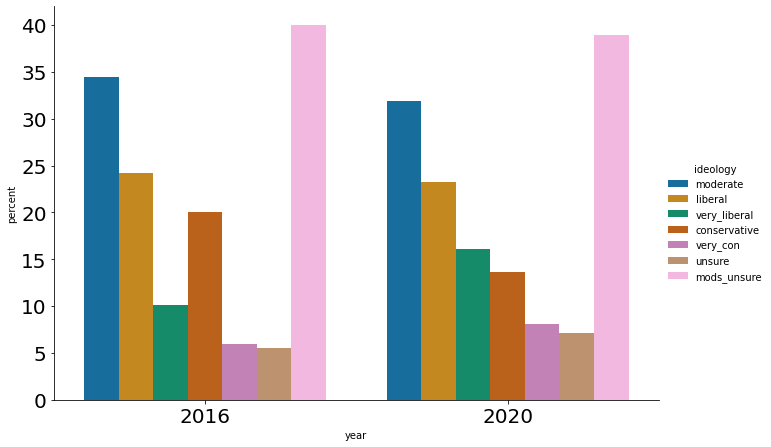

In [87]:
g = sns.catplot(x="year", y="percent", hue="ideology", data=df_ideology,
                height=6, aspect=1.5, palette="colorblind", kind="bar")

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Percent', fontsize=20)
fontsize = 20

In [88]:
cali16.value_counts('marstat')

marstat
Married                   2986
Single / Never Married    1834
Divorced                   610
Widowed                    258
Domestic Partnership       229
Separated                   96
dtype: int64

Remember, small shifts matter, especially in smaller samples.  Our n is decent, but it's still relatively small, given the population of California.  The plots and tables above illustrate that the percentage of moderates has decreased, the percentage of liberals is effectively the same, the percentage of very liberals increased, the percentage of conservatives dropped, and there was a slight uptick in very conservatives and unsures.

Aside from the slight uptick in "very conservative" respondents, all of these factors could be correlated with the drop in age.  Young people tend to be more liberal and more uncertain.

In [89]:
cali20[['dist', 'cong', 'gender', 'birthyr', 'age', 'educ', 'race', 'faminc', 'marstat','newsint', 'approval_gov','ideo5', 'voted_gov']]

,dist,cong,gender,birthyr,age,educ,race,faminc,marstat,newsint,approval_gov,ideo5,voted_gov
44755,25,116,Female,1959,61,2-Year,White,Prefer not to say,Single / Never Married,Some of the time,Strongly Approve,Liberal,NaN
44756,30,116,Female,1934,86,Post-Grad,White,Prefer not to say,Widowed,Most of the time,Approve / Somewhat Approve,Moderate,NaN
44757,14,116,Female,1971,49,Some College,White,Prefer not to say,Married,Most of the time,Never Heard / Not Sure,Moderate,NaN
44758,49,116,Female,1957,63,Some College,White,80k - 100k,Married,Only now and then,Disapprove / Somewhat Disapprove,Moderate,NaN
44759,43,116,Male,1971,49,4-Year,Hispanic,150k+,Married,Some of the time,Strongly Disapprove,Conservative,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49778,10,116,Male,1990,30,No HS,White,20k - 30k,Single / Never Married,Don't Know,Never Heard / Not Sure,Very Liberal,NaN
49779,4,116,Female,1989,31,High School Graduate,White,Less than 10k,NaN,Hardly at all,Disapprove / Somewhat Disapprove,Not Sure,NaN
49780,53,116,Male,1951,69,Some College,Hispanic,120k - 150k,Married,Most of the time,Disapprove / Somewhat Disapprove,Moderate,NaN
49781,52,116,Female,1976,44,No HS,White,Less than 10k,Widowed,Only now and then,Approve / Somewhat Approve,Moderate,NaN


In [90]:
cali20['voted_gov_chosen'].value_counts()

Series([], Name: voted_gov_chosen, dtype: int64)

In [91]:
df['voted_gov_chosen'].value_counts()

Gavin Newsom (D)    2301
John H. Cox (R)     1384
Name: voted_gov_chosen, dtype: int64

In [92]:
df['intent_gov_chosen'].value_counts()

Gavin Newsom (D)    2527
John H. Cox (R)     1499
Name: intent_gov_chosen, dtype: int64

In [93]:
df['voted_gov'].value_counts()

[Democrat / Candidate 1]       2304
[Republican / Candidate 2]     1385
I Did Not Vote In This Race      37
Not Sure                         25
Other                            14
Name: voted_gov, dtype: int64

In [94]:
#looking like our dataframe looks like we need to focus on the 2018 data.
df.loc[df['year'] == 2018, ['voted_gov']].head()

,voted_gov
37821,[Democrat / Candidate 1]
37822,[Democrat / Candidate 1]
37823,[Democrat / Candidate 1]
37824,NaN
37825,[Republican / Candidate 2]


In [95]:
# breaking down the dataframe to just 2018 and the state of california.
df = df[(df['year'] == 2018) & (df['state']== 'California')]

#looking into relivant data.
df = df[['dist', 'gender', 'age', 'educ', 'race', 'faminc', 'marstat','newsint', 'approval_gov','ideo5','ownhome', 'pid3', 'voted_gov']]

In [96]:
df.head()

,dist,gender,age,educ,race,faminc,marstat,newsint,approval_gov,ideo5,ownhome,pid3,voted_gov
37821,13,Female,84,Some College,White,NaN,Divorced,Most of the time,Strongly Disapprove,Liberal,Own,Democrat,[Democrat / Candidate 1]
37822,19,Female,54,4-Year,White,50k - 60k,Single / Never Married,Most of the time,Strongly Approve,Liberal,Other,Democrat,[Democrat / Candidate 1]
37823,52,Female,28,Some College,White,20k - 30k,Single / Never Married,Most of the time,Strongly Approve,Liberal,Rent,Democrat,[Democrat / Candidate 1]
37824,23,Female,35,High School Graduate,White,50k - 60k,Single / Never Married,Only now and then,Never Heard / Not Sure,Not Sure,Rent,Independent,NaN
37825,49,Male,86,Post-Grad,White,120k - 150k,Widowed,Most of the time,Strongly Disapprove,Very Conservative,Own,Other,[Republican / Candidate 2]


In [97]:
#dropping Nulls
df.dropna(inplace=True)

#exporting csv of 2018 gov results with out.
df.to_csv('../Data/2018_gov_features.csv')

Please refer to our Modeling folder to see how we modeled this dataset to predict California voters.